In [1]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from analysis.utils import optimise_model, plot_variable_importance, load_model, save_model, print_performance_measures, plot_numeric_variable_importance

# Evaluate

In [20]:
df = pd.read_csv('../data/df_simple_model_fs.csv', index_col=0)

X = df.drop('Value', axis=1)
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = load_model('simple-model-xgb')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print_performance_measures(X_test, y_test, y_test_pred, file='performance-simple-model-fs.csv')

[17:44:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



KeyboardInterrupt: 

# Predict

In [33]:
df = pd.read_csv('../data/df_simple_model_fs_unfiltered.csv', index_col=0)
df_clean = pd.read_csv('../data/df_clean.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

results = pd.DataFrame(index=df_clean.index)

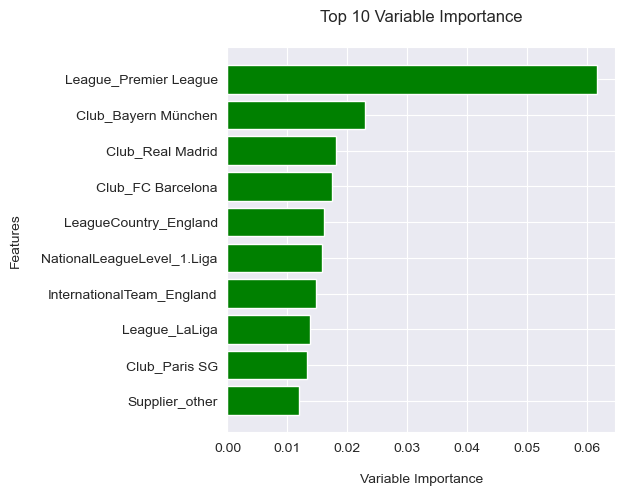

In [34]:
xgb_optimized = load_model('simple-model-xgb')
plot_variable_importance(xgb_optimized, X)

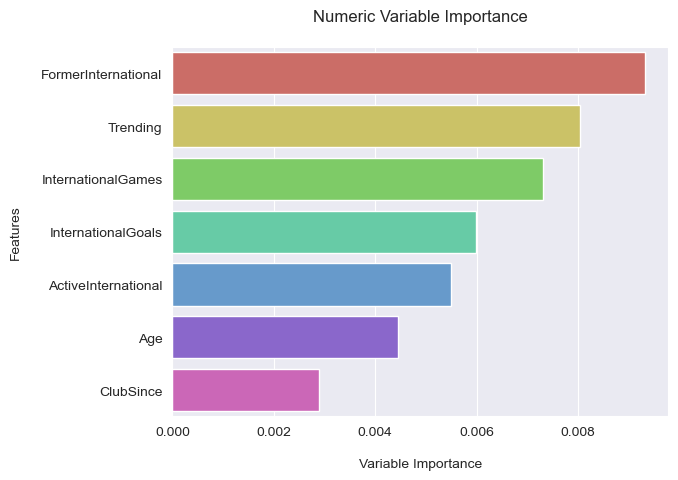

In [35]:
plot_numeric_variable_importance(xgb_optimized, X)

In [36]:
y_pred_xgb = xgb_optimized.predict(X)
y_pred_xgb = pd.DataFrame(index=df.index, data=y_pred_xgb)
results = pd.merge(results, y_pred_xgb, left_index=True, right_index=True, how='left')
print_performance_measures(X, y, y_pred_xgb)

RMSE:		3733360.0158
R^2:		0.7519
Adj. R^2:	0.7326


In [37]:
results.to_csv('../data/df_simple_model_fs_results.csv')

# Model Optimisation

In [2]:
df = pd.read_csv('../data/df_simple_model_fs.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

In [ ]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y)

save_model(xgb_optimized, 'simple-model-xgb')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.47531980423231657, gamma=3.6016224672107904, learning_rate=0.010057187408672444, max_depth=6, n_estimators=385, reg_alpha=0.23608897695197606, reg_lambda=0.3965807272960261, subsample=0.44911966704580664; total time= 6.6min
[CV] END colsample_bytree=0.5809725180523153, gamma=4.569810122896165, learning_rate=0.23860240399349414, max_depth=2, n_estimators=402, reg_alpha=0.7783892363365335, reg_lambda=0.7159705159683643, subsample=0.8224817535436284; total time= 2.6min
[CV] END colsample_bytree=0.18352072777666412, gamma=2.590762744709445, learning_rate=0.4425101259894917, max_depth=2, n_estimators=314, reg_alpha=0.8296033593941836, reg_lambda=0.27304997421674737, subsample=0.15331888117140713; total time=  42.4s


/Users/jonasvogel/opt/miniconda3/envs/jonas/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.702771433123132, gamma=4.677695354030159, learning_rate=0.43315545834300856, max_depth=6, n_estimators=452, reg_alpha=0.5245481595728714, reg_lambda=0.44345289377955666, subsample=0.306619492356843; total time= 8.1min
[CV] END colsample_bytree=0.5809725180523153, gamma=4.569810122896165, learning_rate=0.23860240399349414, max_depth=2, n_estimators=402, reg_alpha=0.7783892363365335, reg_lambda=0.7159705159683643, subsample=0.8224817535436284; total time= 2.6min
[CV] END colsample_bytree=0.8049830254253976, gamma=2.0626942075151304, learning_rate=0.027085655592919526, max_depth=3, n_estimators=65, reg_alpha=0.6606357302380029, reg_lambda=0.2984952947530447, subsample=0.5015210554774955; total time=  43.4s
[CV] END colsample_bytree=0.47531980423231657, gamma=3.6016224672107904, learning_rate=0.010057187408672444, max_depth=6, n_estimators=385, reg_alpha=0.23608897695197606, reg_lambda=0.3965807272960261, subsample=0.44911966704580664; total time= 6.6min
[CV] EN